# ULMFiT Suppervised Model - Twitter US Airlines Sentiment Analysis

## Problem Statement

Apply a supervised or semi-supervised ULMFiT (universal language model fine-tuning)model to Twitter US Airlines Sentiment data. 
This project work demonstrates application of a pretrained language model on Twitter US Airlines Sentiments. 

Data for this analysis is available on https://www.kaggle.com/crowdflower/twitter-airline-sentiment#Tweets.csv
#### Prepared by Axita A. Gupta 
#### 03/10/2020

## 1. Introduction

### ULMFiT Sentiment Analysis

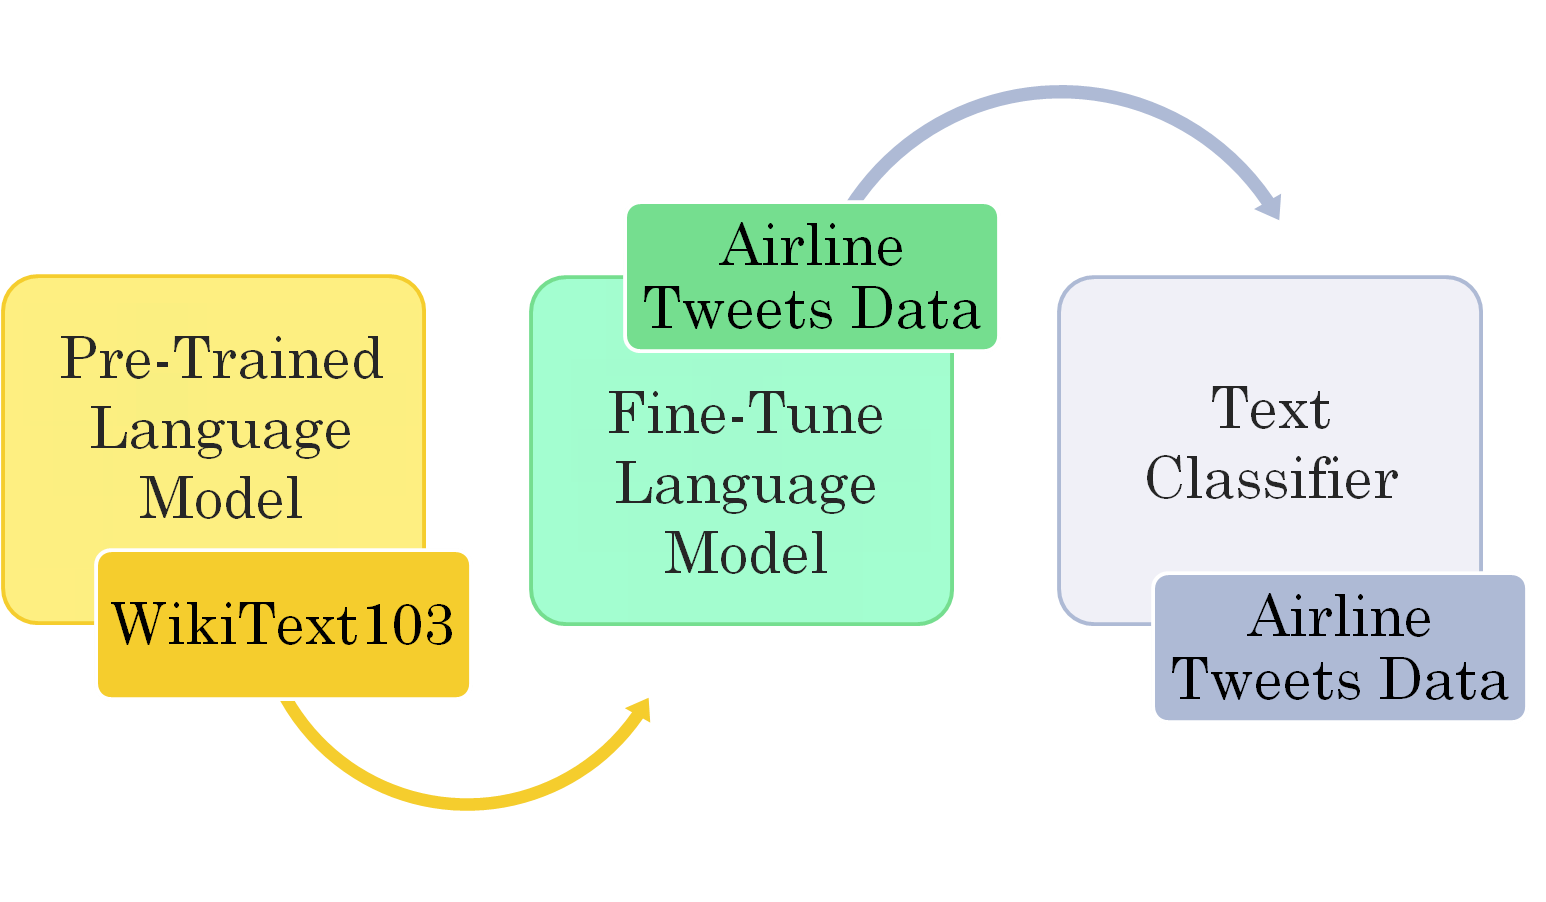

In [1]:
from IPython.display import Image
Image(filename = "img/MODEL_PROCESS.png", width = 500, height = 500)

Universal Language Model Fine-tuning (ULMFiT) is an  effective transfer learning method that can be applied to any task in natural language processing (NLP), and introduce techniques that are key for fine-tuning a language model (Howard.J & Ruder.S, 2018)

#### ULMFiT uses techniques like:
* Discriminative Fine-tunning
* Slanted triangular learning rate
* Gradual unfreezing

This method involves fine-tuning a pre-trained language model (trained on WikiTest 103 dataset) on the new dataset in a manner that it does not forget what the model has already learned. (https://www.analyticsvidhya.com/blog/2018/11/tutorial-text-classification-ulmfit-fastai-library/)

#### What is Sentiment Analysis ? 
* Sentiment analysis is a part of text classification problem.
* It refers to natural language processing, text analysis and other techniques used to indentfy and classify sentiments.
* In this type of text classification problem a phrase or list of phrase are analyzed by a classifier model to tell if the    sentiment  behind the phrase is positive, negative or neutral.

### Sentiment Analysis - Process

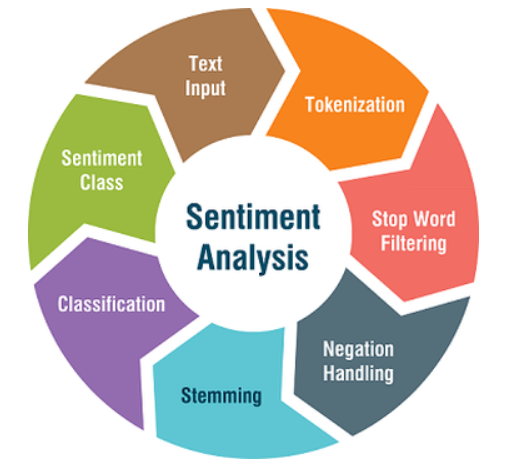

In [53]:
from IPython.display import Image
Image(filename = "img/sentiment_analysis.png", width = 300, height = 300)
# https://medium.com/@tomyuz/a-sentiment-analysis-approach-to-predicting-stock-returns-d5ca8b75a42

#### The figure above shows the process of sentiment analysis where the text input is first tokenized i.e. broken into words followed by filtering, stemming and classification.

###  Purpose

The purpose of this study is to perform sentiment analysis using ULMFiT supervised model to classify US Airline tweets whether Positive, Negative or Neutral. WikiText-103 pre-trained language model is fine-tuned and used to classify tweet sentiments. This project also shows how FastAI works for sentiment analysis. 

### Tools

Language - Python 3.7.3

Packages Utilized

* pytorch 1.4.0
* torchvision 0.5.0
* fastai 1.0.60
* pandas 0.24.2
* matplotlib 3.0.3
* nltk 3.4
* ipython 7.4.0
* seaborn 0.9.0

### Method

**Wikitext-103 natural language model (NLP)** is the pre-trained model used to fine tune and classify sentiments. Required packages were imported and libraries were loaded and the data was imported from https://www.kaggle.com/crowdflower/twitter-airline-sentiment#Tweets.csv. 

#### 1) Data Visualization or Exploratory Data Analysis (EDA)
* EDA was performed to understand and find trends in data followed by data cleaning and pre-processing. 

#### 2) Data Cleaning and Pre-Processing
* Twitter US Airline sentiment data cotained puntuations, slangs, unnecessary symbols, etc.
* Therefore, data was cleaned by removing these slangs, punctuations, and other unnecessary symbols before training. 

#### 3) Feature Engineering - Creating New Dataframe with Text and Labels
* Necessary labels were created for the features where positive, negative, and neutral sentiments were labelled as 1, -1 and 0 respectively.
* Where labels for 3 classes were converted to integers.

#### 4) Modelling and Analysis
* Dividing dataset into training and testing datasets 
* Checking Sentiment Distribution in datasets
* Loading Pre-trained language model and supervised classifier
* Fine-Tuning the pre-trained model
* Fine-Tuning classifier model
* Making predictions

##### FastAI - "A layered API for deep learning"  text library was used to perform sentiment analysis. This library has all the necessary functions to perform for Natural Language Processing (NLP) tasks and generate models.

## 2. Notebook Setup

In this step, all the necessary packages are imported and libraries are loaded. Primary work is accomplished using fastai library which sits on Pytorch. The fastai library has most of the useful functions needed to perform sentiment analysis.

In [3]:
import re
import os
import string
import pandas as pd
import seaborn as sns
import nltk
import collections
import matplotlib.pyplot as plt
%matplotlib inline

from functools import partial
from collections import Counter
from nltk.corpus import wordnet
nltk.download('stopwords')
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shant\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import fastai
from fastai import *
from fastai.text import *
from fastai.core import *
import pickle
from fastai.callbacks import *

## 3. Loading Data

In [6]:
# Import dataset and view the first few lines of dataset
df = pd.read_csv('Tweets.csv', sep=',')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
# Checking shape of data
df.shape

(14640, 15)

#### Total 14,640 tweets and 15 attributes/features

## 4. Exploratory Data Analysis

### Total count of data by each airline

* Highest number of tweets for United airlines > 3500 and lowest for Virgin America < 500 tweets.

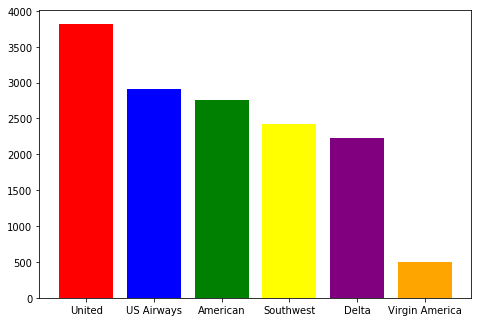

In [127]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
airline = ['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America']
ax.bar(airline, height=df.airline.value_counts(), color=["red","blue","green","yellow","purple","orange"])
plt.show()

### Percentage of data distribution by each airlne

* Highest number of tweets for United airlines ~26% and lowest for Virgin America ~3.4% tweets.

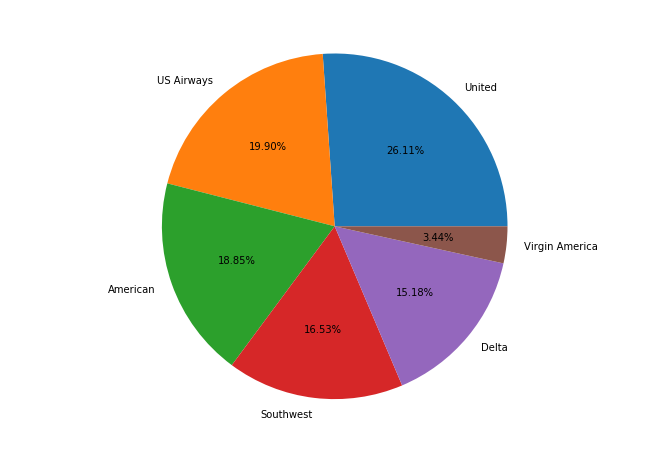

In [11]:
fig = plt.figure()
ax = fig.add_axes([0.5,0.5,1.5,1.5])
ax.axis('equal')
airline = ['United', 'US Airways', 'American', 'Southwest', 'Delta', 'Virgin America']
ax.pie(df.airline.value_counts(), labels = airline,autopct='%1.2f%%')
plt.show()

### Percentage distibution of negative, neutral, and positive sentiments

* This visualization clearly shows that data contains highest number of negative tweets ~63%, followed by neutral ~21% and positive ~16%.

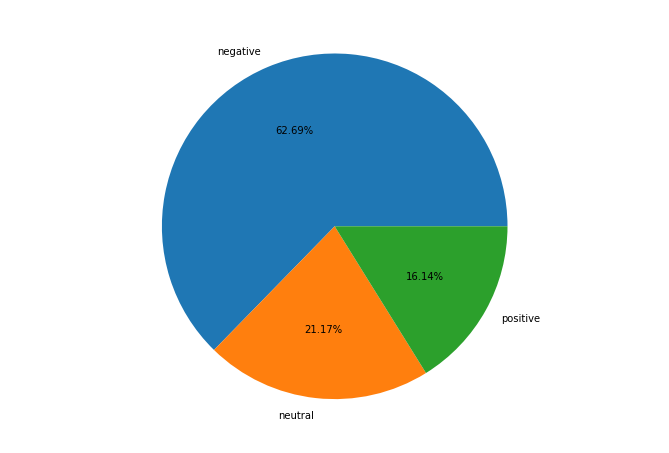

In [8]:
fig = plt.figure()
ax = fig.add_axes([0.5,0.5,1.5,1.5])
ax.axis('equal')
airline_sentiment = ['negative', 'neutral', 'positive']
ax.pie(df.airline_sentiment.value_counts(), labels = airline_sentiment,autopct='%1.2f%%')
plt.show()

In [13]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


### Frequency Distribution of negative, neutral, and positive tweets by individual airline

* All airlines show high number of negative sentiments.

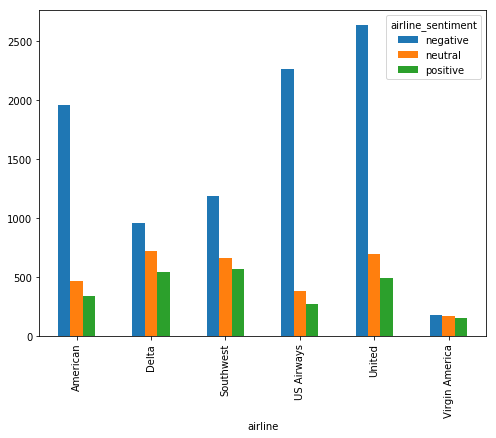

In [14]:
airline_sentiment = df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack()
airline_sentiment.plot(kind='bar')
plt.show()

### Checking for Airline Sentiment Confidence

* Negative sentiments shows highest sentiment confidence followed by positive and netural. But overall all the sentiment show confidence level greater than  to 0.8.

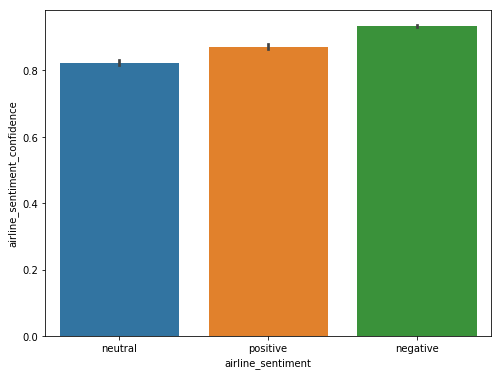

In [17]:
sns.barplot(x='airline_sentiment', y='airline_sentiment_confidence' , data=df)
plt.show()

### Checking for relationship between tweet length and airline sentiment

* Only negative sentiment tweets show high correaltion with tweet length. This implies that people with negative sentiments/experience with airlines tend to write detailed and longer tweets about their experience as compared to positive or neutral sentiments. 
* Positve and neutral sentiments do not show any correlation with tweet length.

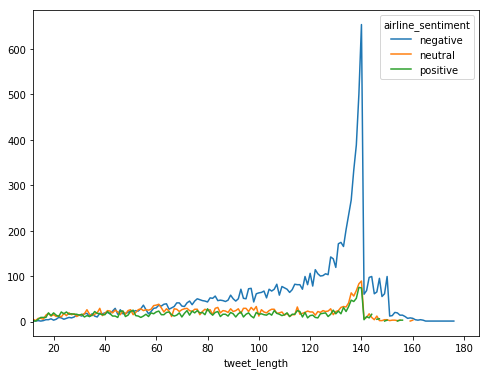

In [18]:
df['tweet_length'] = df['text'].apply(len)
df.groupby(['tweet_length', 'airline_sentiment']).size().unstack().plot(kind='line', stacked=False)
plt.show()

###  Checking for most negative words used per airline

* People travelling with united airlines showed high usage of negative words. 
* Overall all the airlines how higher use of negative words realted to customer service issues (shown in red), flight delays (shown in gray) and can't tell (orange).

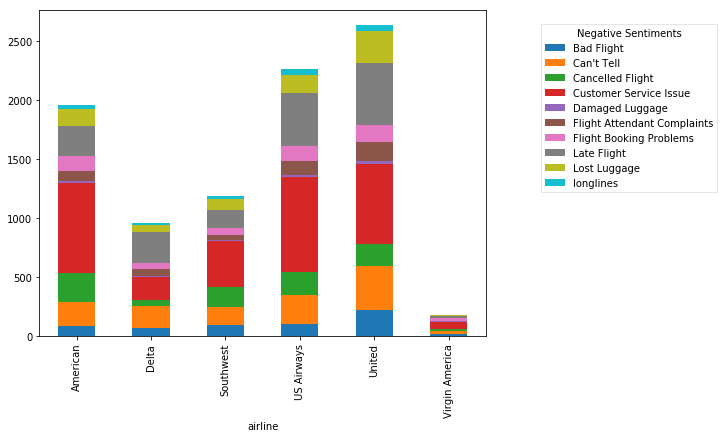

In [21]:
pd.crosstab(df.airline, df.negativereason).plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.55, 1),title='Negative Sentiments',loc =1,fancybox=False, framealpha=0.5,borderaxespad=1.4)
plt.show()

## 5. Data Cleaning and Pre-Processing 

In order to effectively train the language model it is very important to clean and pre-process the text data properly. The pre-processing of text data was adapted from article written by Effrosynidis. D etal,2017. According to Effrosynidis. D., etal 2017, **"Pre-processing is considered to be the first step in text classification, and choosing the right
pre-processing techniques can improve classification effectiveness".** 

Codes for this section were adopted from https://www.analyticsvidhya.com/blog/2018/11/tutorial-text-classification-ulmfit-fastai-library/ and https://github.com/Deffro/text-preprocessing-techniques.

Data Cleaning and pre-processing step involves getting rid of hashtags, puntuations, emojis, slangs, stopwords, etc., the text data. Tokenization process breaks down sentencens into words. 

###  Retaining Alphabets

In [20]:
df['text'] = df['text'].str.replace("[^a-zA-Z]", " ") #retaining only alphabets

### Tokenization and Removing Stopwords

* This process involves breaking down sentences into words and removing stopwords like for, can, be, etc., and then de-tokenizing which is the process of bringining words from a sentence together, reverse of tokenization. 

In [21]:
# Tokenization 
tokenized_doc = df['text'].apply(lambda x: x.split())

# Removing stop-words 
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# De-tokenization 
detokenized_doc = [] 
for i in range(len(df)): 
    t = ' '.join(tokenized_doc[i]) 
    detokenized_doc.append(t) 

df['text'] = detokenized_doc

In [22]:
# Removing mentions
df['text'] = df['text'].apply((lambda x: re.sub(r'@\w+', '',x))) 

# Removing emoji
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-Z0-9,;:!?.\s]','',x))) 

# Removing other emoji's
df['text'] = df['text'].apply((lambda x: re.sub(':\)|;\)|:-\)|\(-:|:-D|=D|:P|xD|X-p|\^\^|:-*|\^\.\^|\^\-\^|\^\_\^|\,-\)|\)-:|:\'\(|:\(|:-\(|:\S|T\.T|\.\_\.|:<|:-\S|:-<|\*\-\*|:O|=O|=\-O|O\.o|XO|O\_O|:-\@|=/|:/|X\-\(|>\.<|>=\(|D:', '',x))) 

# Removing Hashtags
df['text'] = df['text'].apply((lambda x: re.sub(r'#([^\s]+)', r'\1', x))) 

# Removing Numbers
df['text'] = df['text'].apply((lambda x: ''.join([i for i in x if not i.isdigit()]))) 

# Checking firt 10 rows of data
df['text'].head(10)

0                     VirginAmerica What dhepburn said
1    VirginAmerica plus added commercials experienc...
2    VirginAmerica I today Must mean I need take an...
3    VirginAmerica really aggressive blast obnoxiou...
4                   VirginAmerica really big bad thing
5    VirginAmerica seriously would pay flight seats...
6    VirginAmerica yes nearly every time I fly VX e...
7    VirginAmerica Really missed prime opportunity ...
8                      virginamerica Well I NOW I DO D
9    VirginAmerica amazing arrived hour early You good
Name: text, dtype: object

## 6. Feature Engineering

### Create new dataframe with text and labels

* Creating a new dataframe with two columns labels (3 classes of sentiments - positive, negative and neutral) and text (sentiment).
* Two columns airline sentiment - Text and labels - sentiments class are the two columns need for sentiment analysis, therefore removing other attibutes by creating new dataframe

In [31]:
# New Dataframe
df = df[['airline_sentiment', 'text']]
df = df.rename(columns={'airline_sentiment':'labels'})
df.head()

,labels,text
0,neutral,VirginAmerica What dhepburn said
1,positive,VirginAmerica plus added commercials experienc...
2,neutral,VirginAmerica I today Must mean I need take an...
3,negative,VirginAmerica really aggressive blast obnoxiou...
4,negative,VirginAmerica really big bad thing


### Data type conversion

* Three classes of labels positive, negative and neutral where labelled as integers 1, -1 and 0 repectively, so that the language model cannot run though these labels as text.

In [32]:
# Changing labels into integers
df.loc[df['labels'] == 'positive', 'labels'] = 0
df.loc[df['labels'] == 'neutral', 'labels'] = 1
df.loc[df['labels'] == 'negative', 'labels'] = -1
df.head()

,labels,text
0,1,VirginAmerica What dhepburn said
1,0,VirginAmerica plus added commercials experienc...
2,1,VirginAmerica I today Must mean I need take an...
3,-1,VirginAmerica really aggressive blast obnoxiou...
4,-1,VirginAmerica really big bad thing


In [33]:
# Checking for shape of data
df.shape

(14640, 2)

* New dataframe now shows total 14,640 rows of sentiments with 2 columns.

## 7. Model Building

###  Dividing data into training and test sets (80-20 data split)

* New dataset with 14640 sentiments was divided into randomly selected 20% test set and remaining 80% dataset was the trained dataset

#### Ramdom selection of 20% test set data and keeping rest 80% as the training set

In [34]:
# Test Set
test_df = df.sample(frac=0.20) 
# Training Set
train_df = df.drop(test_df.index) 

#### Checking sample size for training and test set

In [35]:
# Print the number of samples in each set
print('Trainset-sample size: {} \nTestset-sample size: {}'.\
      format(train_df.shape[0], test_df.shape[0]))

Trainset-sample size: 11712 
Testset-sample size: 2928


### Sentiment Distribution

* Checking for equal distribution of data within three sentiment classes in both training and test sample sets.
* Getting value counts for each variable and storing data in a dataframe.
* Adding column with relative percentage of each categorical variable.

In [ ]:
def column_value_counts(df, target_column, new_column):
 
    df_value_counts = df[target_column].value_counts()
    df = pd.DataFrame(df_value_counts)
    df.columns = [new_column]
    df[new_column+'_%'] = 100*df[new_column] / df[new_column].sum()
    return df

# Frequency distribution in dataset
df_train = column_value_counts(train_df, 'labels', 'Train')
df_test = column_value_counts(test_df, 'labels', 'Test')

# Merging Dataframes
label_count = pd.concat([df_train, df_test], axis=1)
# Replacing NaN with Zero (0)
label_count = label_count.fillna(0)
# Rounding off decimal places to 2
label_count = label_count.round(2)

#### Similar distribution of data is observed across all three sentiment classes

In [37]:
print(label_count)

    Train  Train_%  Test  Test_%
-1   7335    62.63  1843   62.94
 1   2477    21.15   622   21.24
 0   1900    16.22   463   15.81


## 8. Language and Classifier Models

For this part of the process references below were used

* https://docs.fast.ai/text.data.html#TextLMDataBunch
* https://www.analyticsvidhya.com/blog/2018/11/tutorial-text-classification-ulmfit-fastai-library/

### Preparing data for modelling

* Preparing the data for language model and classifier model using DataBunch which handles this pre-processing internally.

In [40]:
# Language model data
data_lm = TextLMDataBunch.from_df(train_df = train_df, valid_df = test_df, path = "")

# Classifier model data
data_clas = TextClasDataBunch.from_df(path = "", train_df = train_df, valid_df = test_df, 
                                      vocab=data_lm.train_ds.vocab, bs=15)

### Examples of databunch for language and classifier model

* Checking first 10 rows to confirm TextDataBunch is working properly for both language and classifier models.

In [42]:
# Examples of data bunch for language model
data_lm.show_batch()
data_lm.vocab.itos[:10]

idx,text
0,trip xxmaj australia amp i even gone st trip yet p xxbos virginamerica xxunk i flying fabulous xxmaj xxunk skies u take stress away travel http co xxunk xxbos virginamerica xxmaj thanks xxbos virginamerica xxup sfo xxup pdx schedule still xxup mia xxbos virginamerica xxmaj so excited first cross country flight xxup lax xxup mco i heard nothing great things xxmaj virgin xxmaj america xxunk xxbos virginamerica i flew xxup
1,virginamerica xxmaj hi i trying check website working i tried different browsers problem continues xxbos virginamerica xxmaj thanks great customer service today amp helping get travel sorted xxbos virginamerica thanks guys xxmaj sweet route xxmaj xxunk xxunk xxbos virginamerica love music blasting gate xxmaj boston waiting flight sanfrancisco xxmaj only i could get iced coffee xxbos virginamerica passenger d xxmaj flt assaulted flown i trust xxunk xxmaj crew filed report
2,says time plane gate xxmaj any update long delay xxbos virginamerica group got xxmaj cancelled xxmaj flightlation fees waived i ticket booked xxmaj your reps help either xxbos virginamerica xxmaj are sign bonuses enroll xxmaj elevate xxbos virginamerica got pm xxmaj newark home xxup la xxmaj your folks xxup ewr incredible xxunk xxbos virginamerica still waiting see xxmaj xxunk xxmaj xxunk xxbos virginamerica wondering guys recieved dm able potentially respond
3,xxup ua another xxunk operational issue return flight xxbos united i would like know going current flight lands xxbos united hotels people feel like held hostage someone boarding passes leave xxup fail xxbos united xxmaj outbound bags lbs bags xxmaj returning home bag lbs xxmaj what logic xxmaj and xxup why xxmaj am i writing xxmaj machine xxmaj human xxup help required xxbos xxunk united xxmaj we like hear poor
4,way travel xxmaj thank http co xxunk x xxunk xxbos united yes awful weather appears i get home xxbos united yes lots xxmaj you terrible customer service xxmaj newark despite raising complaint ignored hence tweet xxbos united xxmaj lovely new plane xxup lga xxup ord power outlets xxbos united tweet xxup id number xxunk home address anyone web xxbos united i filed delayed bag report xxmaj saturday flight xxmaj cancelled


['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'i']

In [111]:
# Examples of data bunch for classifier model
data_clas.show_batch()
ata_clas.vocab.itos[:10]

text,target
xxbos i xxup just xxup asked xxup my xxup boyfriend xxup to xxup prom xxup over xxup the xxup xxunk xxup on xxup flight xxup he xxup said xxup yes xxrep 4 ! xxup best xxup day xxup ever ! ! ! xxup thank u xxup so xxup much xxrep 6 !,0
xxbos xxmaj the xxmaj fact xxmaj that u xxmaj see xxmaj black xxmaj history xxmaj month xxmaj months a xxmaj year xxmaj is xxmaj xxunk ! xxmaj we xxup will xxup be xxmaj an xxmaj xxunk xxmaj base xxmaj for xxmaj xxunk xxmaj like u xxmaj in xxmaj future !,0
"xxbos i had to travel to xxmaj savannah , xxup ga , once again , on an airline i do nt xxmaj luv . xxmaj when r u going to fly me to xxmaj savannah ? xxmaj pl xxrep 4 e ase xxrep 4 !",1
xxbos xxmaj aww xxmaj thanks xxup aa .. xxup dfw was on xxup xxunk up here this xxup am .. so i understand .. xxmaj btw xxup xxunk is my xxmaj airline when i m able to xxunk .. xxmaj love you guys .,0
xxbos xxup xxunk xxmaj cancelled xxmaj flight flight h in advance ? ? ? xxmaj need connect flight reschedule so the link is nt helping . xxmaj help ! ? xxmaj gf waited months to see me .,-1


['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

## 9. Fine-Tuning the Pre-Trained Language Model

* FastAI's language_model_learner() function was used to create model with the pretrained WikiText 103 model, AWD_LSTM, and droput percentage. 
* FastAI's standard training pipeline was followed after creating model. 
* This pipeline consists of finding the best learning rate, training the top layers, unfreezing all layers, and repeating the above process.
* Since AWD_LSTM automatically uses pretained weights it provides better downstream performance. 
* There AWD_LSTM model was used to train and fine-tune model with pretrained weights.

In [111]:
learn = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained=URLs.WT103_BWD, drop_mult=0.5)

### Finding Learning Rate and Plotting Learn Rate vs. Loss Graph
* https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0

* "This parameter tells the optimizer how far to move the weights in the direction opposite of the gradient for a mini-batch".
* "If the learning rate is low, then training is more reliable, but optimization will take a lot of time because steps towards the minimum of the loss function are tiny".
* "If the learning rate is high, then training may not converge or even diverge. Weight changes can be so big that the optimizer overshoots the minimum and makes the loss worse".

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.98E-02
Min loss divided by 10: 1.74E-02


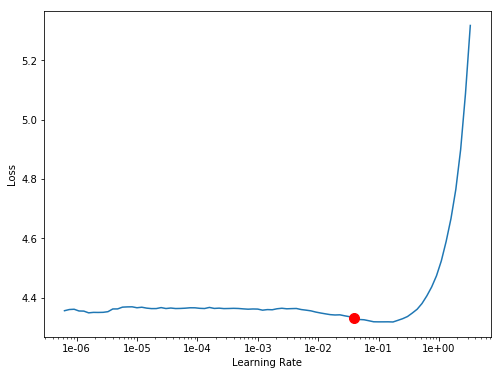

In [82]:
# To find optimum learning rate
learn.lr_find()
learn.recorder.plot(suggestion=True)

### Training results (shows loss and accuracy metrics after the end of the epoch)

In [81]:
# From above plot we can use learning rate of 1e-2
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.841749,4.252184,0.224522,10:12


In [83]:
# Unfreeze last layer (following the sentiment analysis pipeline)
learn.freeze_to(-1)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.282795,4.083858,0.242570,10:32


In [84]:
#  Unfreeze one more layer (following the sentiment analysis pipeline)
learn.freeze_to(-2)
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.051273,3.946880,0.261017,12:00


In [85]:
# Unfreeze all layers
learn.unfreeze()

In [86]:
learn.fit_one_cycle(1, 1e-1)

epoch,train_loss,valid_loss,accuracy,time
0,4.664970,4.382588,0.217331,11:19


### Saving Language Model

In [87]:
# Save the language model
learn.save_encoder('tweets_lm')

## 10. Classifier model

* The fine tuned language model and saved encoder can now be used to build text classifier model. 
* AWD_LSTM model with 50% dropout is used to fine tune classifier model

### Create Model and Loading Encoder

In [88]:
# Using language model to create classifier model
learn_c = text_classifier_learner(data_clas, arch=AWD_LSTM, drop_mult=0.5)
learn_c.load_encoder('tweets_lm')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (11712 items)
x: TextList
xxbos plus you ve added commercials to the experience ... xxunk .,xxbos i did nt today ... xxmaj must mean i need to take another trip !,xxbos and its a really big bad thing about it,xxbos seriously would pay a flight for seats that did nt have this playing . 
  its really the only bad thing about flying xxup va,xxbos yes , nearly every time i fly xxup vx this ear xxunk wo nt go away
y: CategoryList
0,1,-1,-1,0
Path: .;

Valid: LabelList (2928 items)
x: TextList
xxbos basically stole my glasses , and now i ca nt drive or see in my classes and they re not answering my phone calls . xxunk,xxbos awesome . xxmaj thanks !,xxbos xxmaj these are great fares xxrep 5 !,xxbos yes . xxmaj he s in the next flight,xxbos todays wait was a xxunk of xxunk xxunk xxunk
y: CategoryList
-1,0,0,1,-1
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(5120, 400, 

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.10E-07


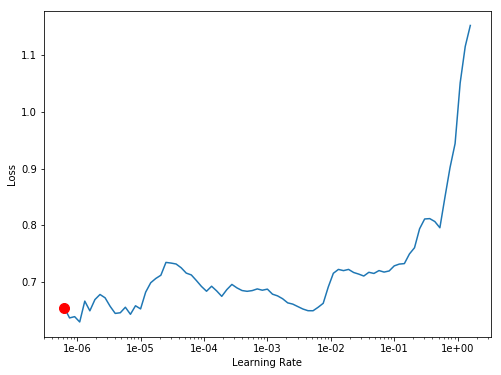

In [91]:
# Finding the learning rate for classifer model
learn_c.lr_find()
learn_c.recorder.plot(suggestion=True)

In [89]:
# Train Classifier Learn Object using learning rate from plot 
# Since the learning plot shows initial/first lowest value at 1e-2
learn_c.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.700544,0.641631,0.737363,30:28


In [92]:
#  Fine tune first 3 epochs/Unfreezing one layer group and training epochs
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(3, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.715622,0.605585,0.760929,33:27
1,0.639828,0.554431,0.774590,37:59
2,0.628185,0.547393,0.785178,37:16


In [93]:
#Fine-tune the 1st 5 epochs after freezing everything except the last two layers
learn_c.freeze_to(-2)
learn_c.fit_one_cycle(5, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.587704,0.564611,0.783470,51:37
1,0.619242,0.539924,0.781421,53:00
2,0.551673,0.536515,0.788251,54:48
3,0.538339,0.536212,0.795765,47:08
4,0.496067,0.538699,0.800546,40:37


In [94]:
#  Unfreeze and fine-tune all layers
learn_c.unfreeze()
learn_c.fit_one_cycle(1, slice(2e-3/100, 2e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.535169,0.552538,0.790984,47:25


### Classifier model is now trained with 79% accuracy with an acceptable valid_loss of 0.55. We can now make predictions using predict() function. 

## 11. Making Predictions

* Classifier model is tested with random sentiment statements to check how well the model is performing. 
* In predictions below, tensor values represents a list of probabilities. Where first, second, and third indices of the tensor list represent probability of the tweet as negative, positive, and neutral.

In [103]:
# Prediction Example - Negative Tweet
learn_c.predict('very bad ticket prices')

C:\Users\shant\Anaconda3\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


(Category -1, tensor(0), tensor([9.9184e-01, 9.1880e-05, 8.0677e-03]))

In [110]:
# Prediction Example - Negative Tweet
learn_c.predict('cancelled flights and very bad prices')

C:\Users\shant\Anaconda3\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


(Category -1, tensor(0), tensor([0.9287, 0.0035, 0.0678]))

In [107]:
# Prediction Example - Positive Tweet
learn_c.predict('enjoyed flight')

C:\Users\shant\Anaconda3\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


(Category 1, tensor(2), tensor([0.3061, 0.0036, 0.6903]))

In [102]:
# Prediction Example - Neutral Tweet
learn_c.predict('good prices')

C:\Users\shant\Anaconda3\lib\site-packages\fastai\torch_core.py:83: UserWarning: Tensor is int32: upgrading to int64; for better performance use int64 input
  warn('Tensor is int32: upgrading to int64; for better performance use int64 input')


(Category 0, tensor(1), tensor([0.0803, 0.8593, 0.0604]))

####  Example of Batch Prediction on Validation Set

In [100]:
# Making batch predictions using get_preds() function
learn_c.get_preds(ds_type=DatasetType.Valid)

[tensor([[9.1749e-01, 9.3722e-03, 7.3138e-02],
         [4.2373e-03, 9.9447e-01, 1.2878e-03],
         [1.7199e-01, 8.1813e-01, 9.8747e-03],
         ...,
         [6.4376e-01, 3.9842e-02, 3.1640e-01],
         [3.2194e-01, 6.7560e-01, 2.4525e-03],
         [4.8616e-01, 2.6158e-04, 5.1358e-01]]),
 tensor([0, 1, 1,  ..., 2, 0, 0])]

In [108]:
learn_c.pred_batch

<bound method Learner.pred_batch of RNNLearner(data=TextClasDataBunch;

Train: LabelList (11712 items)
x: TextList
xxbos plus you ve added commercials to the experience ... xxunk .,xxbos i did nt today ... xxmaj must mean i need to take another trip !,xxbos and its a really big bad thing about it,xxbos seriously would pay a flight for seats that did nt have this playing . 
  its really the only bad thing about flying xxup va,xxbos yes , nearly every time i fly xxup vx this ear xxunk wo nt go away
y: CategoryList
0,1,-1,-1,0
Path: .;

Valid: LabelList (2928 items)
x: TextList
xxbos basically stole my glasses , and now i ca nt drive or see in my classes and they re not answering my phone calls . xxunk,xxbos awesome . xxmaj thanks !,xxbos xxmaj these are great fares xxrep 5 !,xxbos yes . xxmaj he s in the next flight,xxbos todays wait was a xxunk of xxunk xxunk xxunk
y: CategoryList
-1,0,0,1,-1
Path: .;

Test: None, model=SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
  

In [109]:
# Saving Classifier Model
learn_c.save("sentiment_clas")

## 12. Conclusion

Above results show that ULMFiT supervised model and FastAI text library can be sucessfully used to classify sentiments.

## 13. Remarks

* A classifier model with 79% accuracy was generated in this project using gradual unfreezing technique of ULMFiT. 
* FastAI focuses on model building, but once the model is built one can easily export the model for future use without having to building model again.
* Discriminative fine tuning and slanted triangle learning rate - techniques of ULMFiT have been tried and tested in this task.
* It is possible that accuracy of model can be improved if these two ULMFiT features are implemented.

## References

* https://www.kdnuggets.com/2019/04/text-preprocessing-nlp-machine-learning.html
* https://sentic.net/microtext-normalization.pdf
* https://www.analyticsvidhya.com/blog/2018/11/tutorial-text-classification-ulmfit-fastai-library/
* https://github.com/fastai/fastai
* https://arxiv.org/pdf/1801.06146.pdf
* https://docs.fast.ai/text.html
* http://files.fast.ai/models/wt103/ - Directory to download pretrained language model
* https://www.tutorialspoint.com/matplotlib/matplotlib_pie_chart.htm
* https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0
* https://docs.fast.ai/text.data.html#TextLMDataBunch

# END